# Question 4



In [99]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [100]:
plt.rcParams["figure.figsize"] = (20,20)

In [101]:
def convolve(img,kernel):
    k_size=kernel.shape
    i_size=img.shape
    img1=np.zeros((i_size[0],i_size[1]))
    image_padded = np.zeros((i_size[0] + k_size[0], i_size[1] + k_size[0]))   
    image_padded[int(k_size[0]/2):-1*int(k_size[0]/2)-1, int(k_size[0]/2):-1*int(k_size[0]/2)-1] = img
    for i in range(i_size[0]):
        for j in range(i_size[1]):
            temp=np.multiply(kernel,image_padded[i:i+k_size[0],j:j+k_size[0]])
            img1[i,j]=temp.sum()
    
    #Normalizing output
    img1=img1/kernel.sum()
    img1=np.round(img1)    
    img1=np.clip(img1,0,255)        
    return img1
    

In [102]:
def convolve_colour(img,kernel):
    img1=img.copy()
    img1[:,:,0]=convolve(img[:,:,0],kernel)
    img1[:,:,1]=convolve(img[:,:,1],kernel)
    img1[:,:,2]=convolve(img[:,:,2],kernel)
    
    return img1
    
    
    

In [103]:
def highboostfiltering(img,window_size,weight_factor):
    half=int(window_size/2)
    ##Creating all pass filter with the given weight factor
    w_all_pass=np.zeros((window_size,window_size))
    w_all_pass[half][half]=weight_factor
    ##Creating high pass filter will all center element of kernel as window size -1 and rest all elements as -1
    w_high_pass=np.ones((window_size,window_size))
    w_high_pass=w_high_pass*(-1);
    w_high_pass[half][half]=(window_size)**2-1
    
    kernel=w_all_pass+w_high_pass
    
    
    #Convolving with corresponding high boost kernel gives required output
    return convolve_colour(img,kernel)
    
    

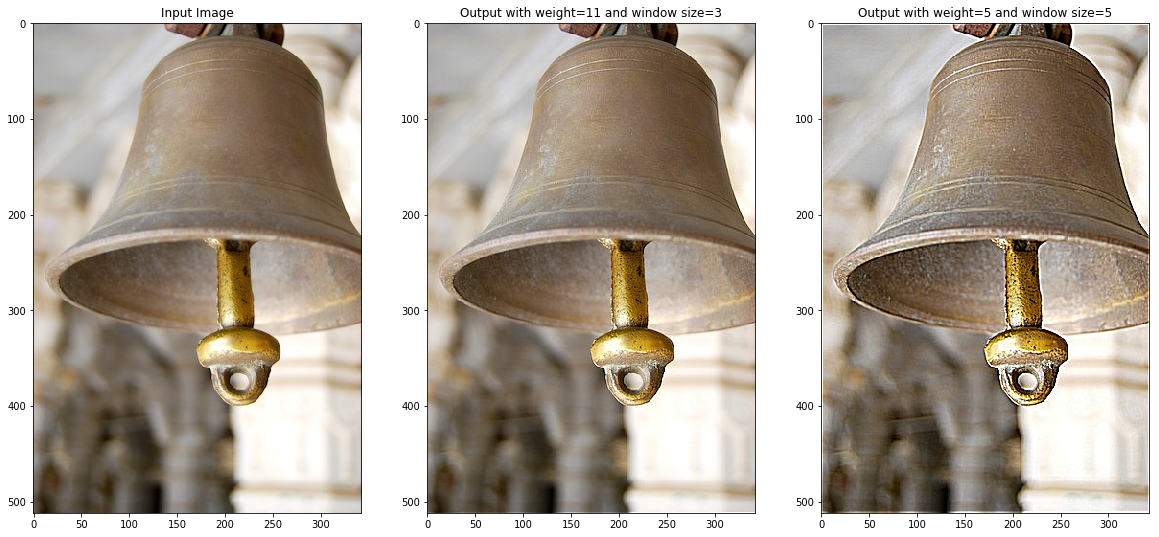

In [104]:
bell_img=cv2.imread('bell.jpg',cv2.IMREAD_COLOR)
bell_img = cv2.cvtColor(bell_img, cv2.COLOR_BGR2RGB)
op1=highboostfiltering(bell_img,3,9)
op2=highboostfiltering(bell_img,5,9)
plt.subplot(1,3,1)
plt.imshow(bell_img,cmap='gray')
plt.title("Input Image")
plt.subplot(1,3,2)
plt.imshow(op1.astype('uint8'))
plt.title("Output with weight=11 and window size=3")
plt.subplot(1,3,3)
plt.imshow(op2.astype('uint8'))
plt.title("Output with weight=5 and window size=5")
plt.show()


## Part 2 :Applying high boost on sample images


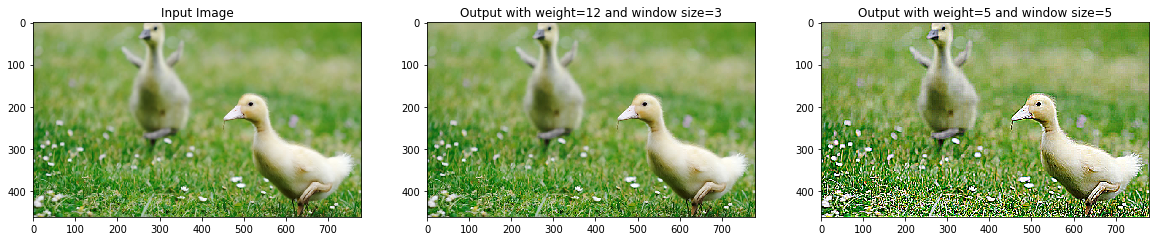

In [105]:
a=cv2.imread('duck.jpg',cv2.IMREAD_COLOR)
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
op1=highboostfiltering(a,3,12)
op2=highboostfiltering(a,5,5)
plt.subplot(1,3,1)
plt.imshow(a,cmap='gray')
plt.title("Input Image")
plt.subplot(1,3,2)
plt.imshow(op1.astype('uint8'))
plt.title("Output with weight=12 and window size=3")
plt.subplot(1,3,3)
plt.imshow(op2.astype('uint8'))
plt.title("Output with weight=5 and window size=5")
plt.show()


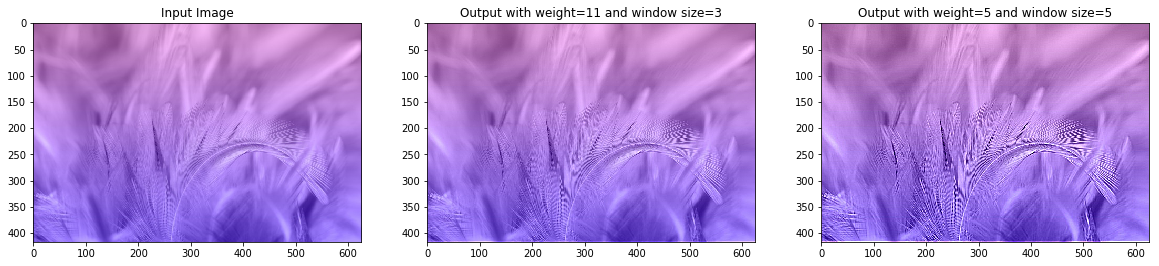

In [106]:
b=cv2.imread('feather.jpg',cv2.IMREAD_COLOR)
b = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)
op1=highboostfiltering(b,3,9)
op2=highboostfiltering(b,5,9)
plt.subplot(1,3,1)
plt.imshow(b,cmap='gray')
plt.title("Input Image")
plt.subplot(1,3,2)
plt.imshow(op1.astype('uint8'))
plt.title("Output with weight=11 and window size=3")
plt.subplot(1,3,3)
plt.imshow(op2.astype('uint8'))
plt.title("Output with weight=5 and window size=5")
plt.show()


## Difference between high boost filter and bilateral filter
### High boost filter enhances the sharpness of image by removing low frequency components present in the image, Whereas bilateral filter smoothens images and also preserves edges. In bilateral a pixel value is replaced by weighted sum of all the intensites of its neighbouring pixels(following gaussian distribution) , where as in high boost more emphasis is laid on the same corresponding pixel intensites and we subtract the intensities of its neighbouring pixels(Ie addition in bilateral and subraction in high boost)